# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

import requests
from api_keys import weather_api_key
import json

# import os
# import csv

from citipy import citipy

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

In [2]:
#create a list for latitude and longitude
lat_points =[]
long_points =[]

#find array of latitude coordinates
random_lat = np.random.uniform(low=-90.00, high=90.00, size=100)
#find array of longitude coordinates
random_long = np.random.uniform(low=-180.00, high=180.00, size=100)
#create coordinate combinations
coordinates = zip(random_lat,random_long)

In [3]:
#create a list for cities to live
unique_cities = []
random_cities = []
#Loop through coordinates to create a list of nearest cities
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #remove the space in between cities with more than 2 names
    #city = city.replace(" ", "20%")
    
    #remove potential repeating cities
    if city not in unique_cities:
        unique_cities.append(city)
    
print(unique_cities)

['revelstoke', 'vammala', 'ketchenery', 'tessalit', 'faanui', 'mahebourg', 'gushikawa', 'castro', 'bardiyah', 'rikitea', 'atuona', 'qandala', 'mineiros', 'marawi', 'impfondo', 'the pas', 'souillac', 'yura', 'bluff', 'hithadhoo', 'klaksvik', 'senanga', 'chake chake', 'ancud', 'winnemucca', 'qaanaaq', 'punta arenas', 'ushuaia', 'bambous virieux', 'husavik', 'lavrentiya', 'taolanaro', 'phonhong', 'katima mulilo', 'hilo', 'makakilo city', 'ponta do sol', 'ixtapa', 'wagar', 'saint george', 'pangnirtung', 'busselton', 'cockburn town', 'hermanus', 'mataura', 'talnakh', 'kodiak', 'sentyabrskiy', 'okhotsk', 'belushya guba', 'oriximina', 'cape town', 'arraial do cabo', 'upata', 'plainview', 'lagoa', 'lodja', 'vaini', 'yellowknife', 'lakatoro', 'srednekolymsk', 'butaritari', 'mount gambier', 'palmer', 'korla', 'quatre cocos', 'antofagasta', 'zapolyarnyy', 'baley', 'payo', 'albany', 'kuche', 'isangel', 'bosaso', 'kaitangata', 'cherskiy', 'sitka', 'paamiut', 'khatanga', 'moses lake', 'dongsheng', '

## Generate Cities List

In [4]:
len(unique_cities)

82

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name = []
latitude = []
longitude =[]
temperature_f = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 1
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Log file print statement
print(f"Begin Data Retrieval")
print(f"----------------------------------")

for city in unique_cities:
    try:
        query_url = f'q={city}&appid={weather_api_key}&units=imperial'
        #api call for individual cities
        url = base_url + query_url
        weather_data = requests.get(url).json()
        city_name.append(weather_data['name'])
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temperature_f.append(weather_data['main']['temp_max'])
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
    except KeyError: 'name'
        

    print
    print(f"Processing Record {count} | {city}")
    count += 1
    
print(f"----------------------------------")    
print(f"Data Retrieval Complete")
print(f"----------------------------------")
# print(city_name)
# print(latitude)
# print(longitude)
# print(temperature_f)
# print(humidity)
# print(cloudiness)
# print(wind_speed)


Begin Data Retrieval
----------------------------------
Processing Record 1 | revelstoke
Processing Record 2 | vammala
Processing Record 3 | ketchenery
Processing Record 4 | tessalit
Processing Record 5 | faanui
Processing Record 6 | mahebourg
Processing Record 7 | gushikawa
Processing Record 8 | castro
Processing Record 9 | bardiyah
Processing Record 10 | rikitea
Processing Record 11 | atuona
Processing Record 12 | qandala
Processing Record 13 | mineiros
Processing Record 14 | marawi
Processing Record 15 | impfondo
Processing Record 16 | the pas
Processing Record 17 | souillac
Processing Record 18 | yura
Processing Record 19 | bluff
Processing Record 20 | hithadhoo
Processing Record 21 | klaksvik
Processing Record 22 | senanga
Processing Record 23 | chake chake
Processing Record 24 | ancud
Processing Record 25 | winnemucca
Processing Record 26 | qaanaaq
Processing Record 27 | punta arenas
Processing Record 28 | ushuaia
Processing Record 29 | bambous virieux
Processing Record 30 | husa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create a df with all unique cities
data_set = {'cities': city_name,
'lat' : latitude,
'long' : longitude,
'max_fahrenheit' : temperature_f,
'humidity' : humidity,
'cloudiness' : cloudiness,
'wind_speed' : wind_speed,
'country' : country,
'date' : date}
weather_data_df = pd.DataFrame(data_set)
weather_data_df

#export file to csv

,cities,lat,long,max_fahrenheit,humidity,cloudiness,wind_speed,country,date
0,Revelstoke,50.98,-118.20,53.60,87,90,1.86,CA,1601257966
1,Vammala,61.33,22.90,52.00,100,0,3.36,FI,1601257967
2,Tessalit,20.20,1.01,85.80,13,0,8.93,ML,1601257968
3,Faanui,-16.48,-151.75,78.28,79,5,14.61,PF,1601257968
4,Mahébourg,-20.41,57.70,71.60,88,40,9.17,MU,1601257969
...,...,...,...,...,...,...,...,...,...
72,Paamiut,61.99,-49.67,36.75,79,0,17.22,GL,1601258000
73,Khatanga,71.97,102.50,31.42,95,92,10.51,RU,1601258001
74,Moses Lake,47.13,-119.28,69.80,30,1,3.60,US,1601258001
75,Dongsheng,39.82,109.98,59.49,69,100,15.32,CN,1601258002


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#check to see if there are any with over 100% humidity
humidity_under_hundred = weather_data_df.loc[weather_data_df['humidity'] > 100]
humidity_under_hundred.count()
#there is none

cities            0
lat               0
long              0
max_fahrenheit    0
humidity          0
cloudiness        0
wind_speed        0
country           0
date              0
dtype: int64

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature in Fahrenheit')

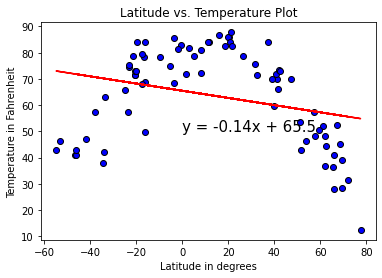

In [23]:
#set the x_axis values to latitude
x_values = weather_data_df["lat"]
y_values = weather_data_df["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")


## Latitude vs. Humidity Plot

Text(0, 0.5, 'Percentage of Humidity')

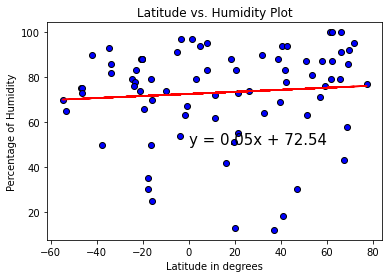

In [24]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Percentage of Cloudiness')

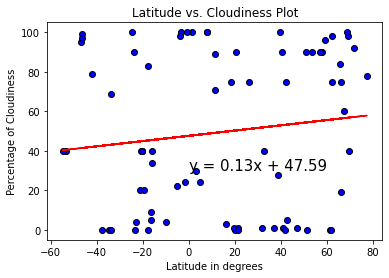

In [27]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

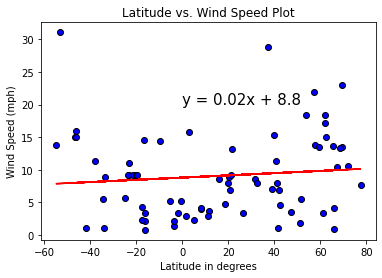

In [29]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [14]:
north_hemisphere = weather_data_df.loc[weather_data_df['lat'] >= 0]
south_hemisphere = weather_data_df.loc[weather_data_df['lat'] < 0]
south_hemisphere

,cities,lat,long,max_fahrenheit,humidity,cloudiness,wind_speed,country,date
3,Faanui,-16.48,-151.75,78.28,79,5,14.61,PF,1601257968
4,Mahébourg,-20.41,57.70,71.60,88,40,9.17,MU,1601257969
6,Castro,-24.79,-50.01,65.68,79,100,5.61,BR,1601257692
8,Rikitea,-23.12,-134.97,74.64,78,0,11.10,PF,1601257966
9,Atuona,-9.80,-139.03,78.26,74,4,14.47,PF,1601257971
11,Mineiros,-17.57,-52.55,79.36,35,0,4.34,BR,1601257972
15,Souillac,-20.52,57.52,71.60,88,40,9.17,MU,1601257974
16,Yura,-16.25,-71.68,49.66,50,9,0.78,PE,1601257974
17,Bluff,-46.60,168.33,41.00,75,95,15.01,NZ,1601257974
18,Hithadhoo,-0.60,73.08,82.85,67,100,5.28,MV,1601257975


Text(0, 0.5, 'Temperature in Fahrenheit')

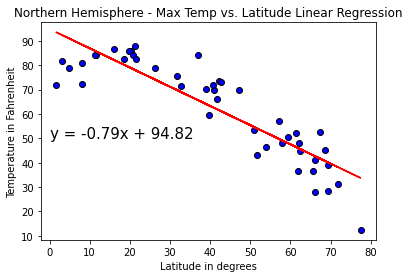

In [30]:
#set the x_axis values to latitude
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature in Fahrenheit')

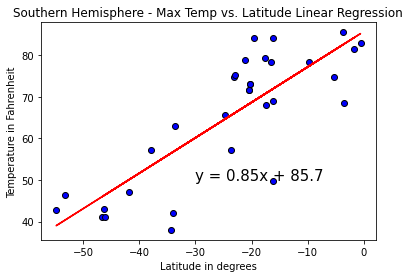

In [49]:
#set the x_axis values to latitude
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Humidity')

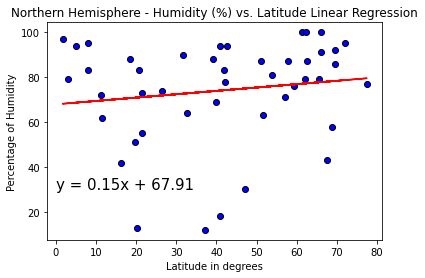

In [33]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Humidity')

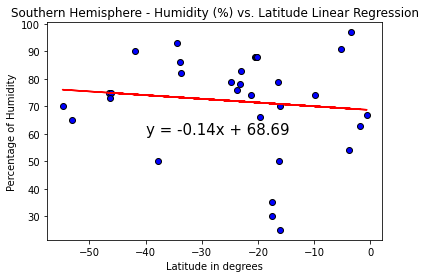

In [48]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Cloudiness')

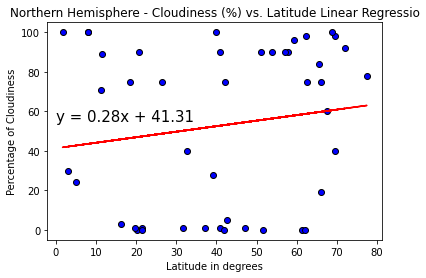

In [36]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,55),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressio")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Cloudiness')

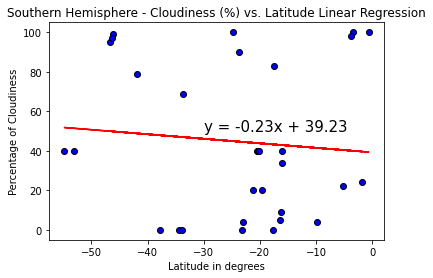

In [43]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

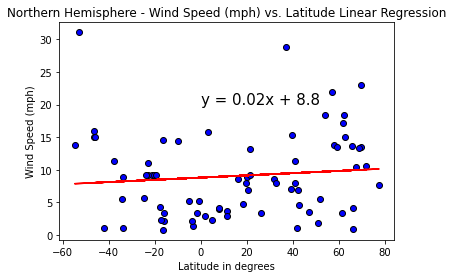

In [39]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

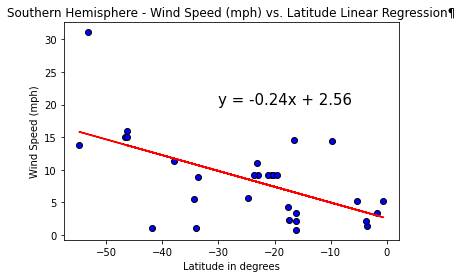

In [42]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")